<a href="https://colab.research.google.com/github/RoseVZ/TensorflowCert/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


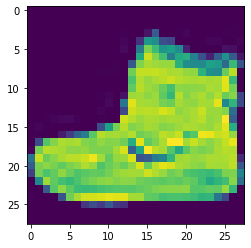

In [6]:
plt.imshow(train_data[0])

In [7]:
train_data.shape

(60000, 28, 28)

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
def plot(Image,label,class_names,choice):
  plt.imshow(Image[choice])
  plt.title(class_names[label[choice]])



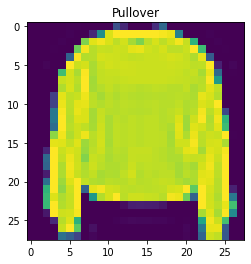

In [10]:
plot(train_data,train_labels,class_names,7)

In [11]:
train_data.min(),train_data.max()

(0, 255)

In [12]:
train_data=train_data/255
test_data=test_data/255

In [13]:
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(40, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7776 - accuracy: 0.7379 - val_loss: 0.5504 - val_accuracy: 0.8175
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4873 - accuracy: 0.8360 - val_loss: 0.5074 - val_accuracy: 0.8335
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4282 - accuracy: 0.8515 - val_loss: 0.4844 - val_accuracy: 0.8240
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3953 - accuracy: 0.8615 - val_loss: 0.4278 - val_accuracy: 0.8493
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3740 - accuracy: 0.8667 - val_loss: 0.4393 - val_accuracy: 0.8486
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3569 - accuracy: 0.8734 - val_loss: 0.4277 - val_accuracy: 0.8492
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3462 - accuracy: 0.8765 - val_loss: 0.4135 - val_accuracy:

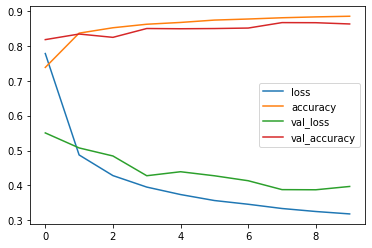

In [14]:
import pandas as pd
pd.DataFrame(norm_history.history).plot()

## Using Callbacks to find ideal learning Rate

In [16]:
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(40, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_callback=tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3*10**(epochs/10))

# Fit the model (to the normalized data)
history2 = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels),
                            callbacks=[lr_callback])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7776 - accuracy: 0.7379 - val_loss: 0.5504 - val_accuracy: 0.8175 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4884 - accuracy: 0.8345 - val_loss: 0.5174 - val_accuracy: 0.8295 - lr: 0.0013
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4301 - accuracy: 0.8491 - val_loss: 0.4712 - val_accuracy: 0.8285 - lr: 0.0016
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3999 - accuracy: 0.8593 - val_loss: 0.4226 - val_accuracy: 0.8504 - lr: 0.0020
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3825 - accuracy: 0.8626 - val_loss: 0.4229 - val_accuracy: 0.8537 - lr: 0.0025
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3744 - accuracy: 0.8647 - val_loss: 0.4709 - val_accuracy: 0.8287 - lr: 0.0032
Epoch 7/10
1875/1875 [==============================] - 7s

In [17]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [18]:
y_probs=model_12.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [19]:

# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

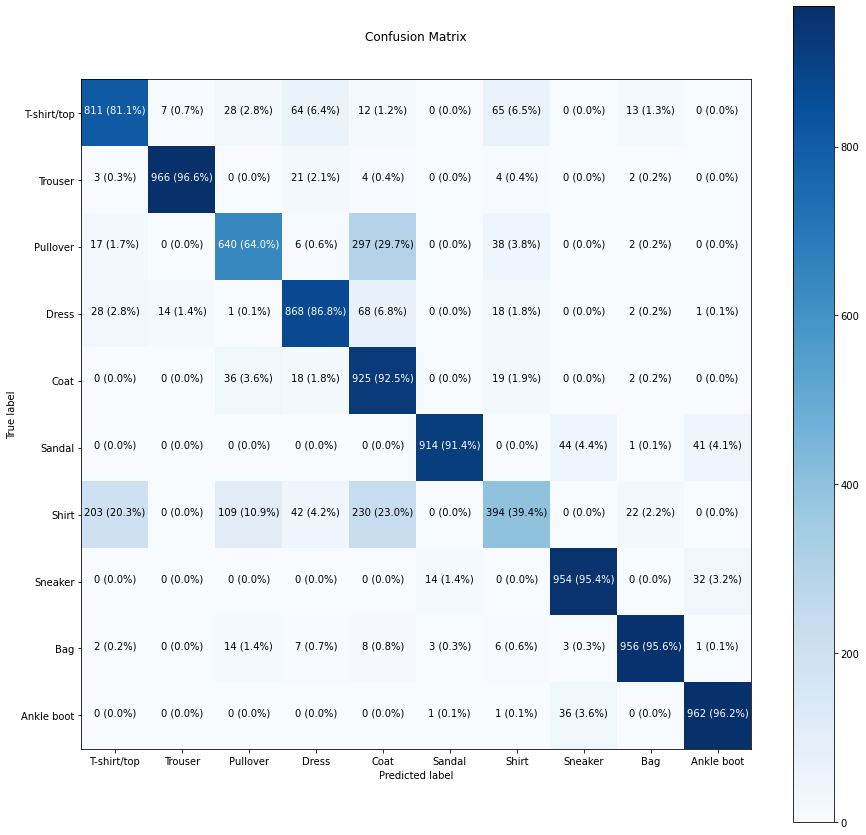

In [20]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)
